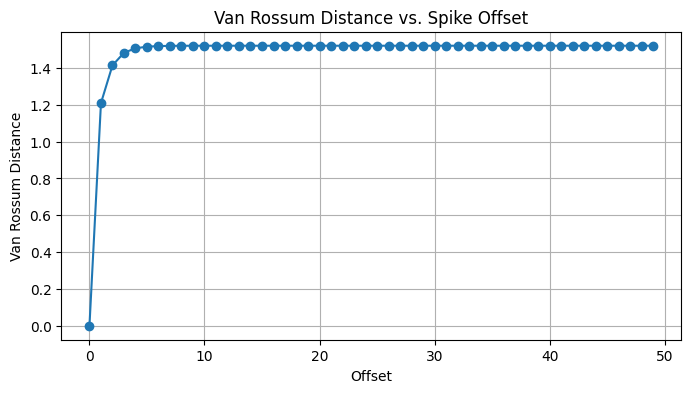

In [3]:
# ---- 1. 라이브러리 임포트 ----
import torch
import matplotlib.pyplot as plt
%matplotlib inline

# ---- 2. van_rossum_distance 함수 및 메인 코드 ----

def van_rossum_distance(spike_train1, spike_train2, tau, dt=1.0):
    """
    Computes the Van Rossum Distance between two spike trains.
    
    Args:
    - spike_train1 (Tensor): First spike train of shape [batch, time, neuron].
    - spike_train2 (Tensor): Second spike train of shape [batch, time, neuron].
    - tau (float): Time constant for the exponential kernel.
    - dt (float): Time step (default is 1.0).
    
    Returns:
    - distance (Tensor): Van Rossum distance for each batch and neuron, shape [batch, neuron].
    """
    # Check the shape consistency
    assert spike_train1.shape == spike_train2.shape, "Both spike trains must have the same shape"
    
    # Shape info
    batch_size, time_steps, num_neurons = spike_train1.shape

    # Time vector
    time = torch.arange(time_steps, dtype=torch.float32, device=spike_train1.device) * dt
    
    # Exponential kernel: exp(-t/tau)
    kernel = torch.exp(-time / tau).view(1, 1, -1)  # Shape [1, 1, time_steps]
    kernel = kernel.expand(num_neurons, 1, -1)      # Shape [num_neurons, 1, time_steps]

    # Convolve spike trains with the exponential kernel
    filtered_spike_train1 = torch.nn.functional.conv1d(
        spike_train1.permute(0, 2, 1),  # [batch, neuron, time]
        kernel,                         # [num_neurons, 1, time_steps]
        padding=time_steps - 1,         # 'full' convolution을 위해
        groups=num_neurons
    )
    
    filtered_spike_train2 = torch.nn.functional.conv1d(
        spike_train2.permute(0, 2, 1),
        kernel,
        padding=time_steps - 1,
        groups=num_neurons
    )
    
    # Compute the squared difference between the filtered signals
    squared_diff = (filtered_spike_train1 - filtered_spike_train2) ** 2
    
    # Sum over time dimension and take sqrt to compute the Van Rossum distance
    distance = torch.sum(squared_diff, dim=2).sqrt()  # [batch, neuron]

    return distance

# ---- 메인 로직 ----
time_steps = 50
batch_size = 1
num_neurons = 1
tau = 1.0  # Exponential decay factor for Van Rossum distance

# Spike train 1: 예시로 50번 째 타임스텝에서만 스파이크
spike_train1 = torch.zeros(batch_size, time_steps, num_neurons)
spike_train1[0, 0, 0] = 1.0  # 50번 지점에 스파이크

distances = []
offset_range = range(time_steps)  # 0 ~ 99

for offset in offset_range:
    # Spike train 2: offset만큼 이동한 위치에서 스파이크
    spike_train2 = torch.zeros(batch_size, time_steps, num_neurons)
    pos = (0 + offset) % time_steps  # 50에서 offset만큼 이동 (100 넘어가면 mod 100)
    spike_train2[0, pos, 0] = 1.0
    
    # Van Rossum distance 계산
    distance = van_rossum_distance(spike_train1, spike_train2, tau=tau)
    # distance는 shape [batch, neuron] -> (1, 1)
    distances.append(distance.item())

# 결과 시각화
plt.figure(figsize=(8, 4))
plt.plot(offset_range, distances, marker='o')
plt.title("Van Rossum Distance vs. Spike Offset")
plt.xlabel("Offset")
plt.ylabel("Van Rossum Distance")
plt.grid(True)
plt.show()


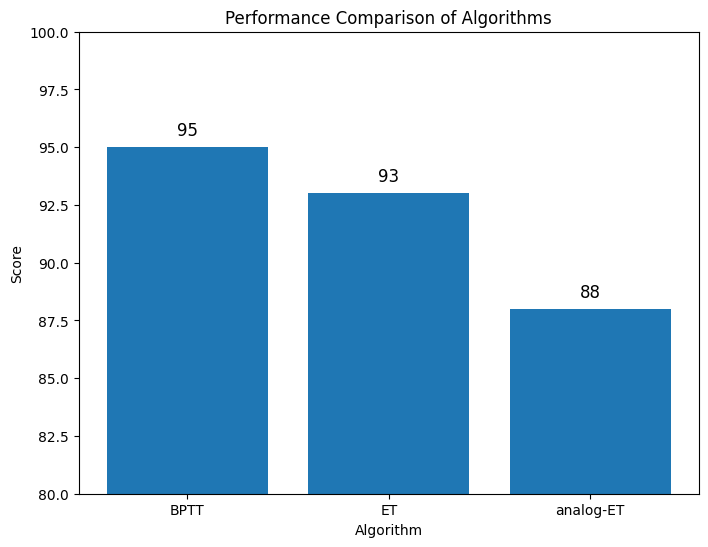

In [1]:
import matplotlib.pyplot as plt

# 알고리즘과 성능 점수 데이터
algorithms = ["BPTT", "ET", "analog-ET"]
scores = [95, 93, 88]

# 막대그래프 생성
plt.figure(figsize=(8, 6))
plt.bar(algorithms, scores)

# 그래프 레이블 및 제목 추가
plt.xlabel("Algorithm")
plt.ylabel("Score")
plt.title("Performance Comparison of Algorithms")
plt.ylim(80, 100)  # Y축 범위 설정

# 값 표시
for i, score in enumerate(scores):
    plt.text(i, score + 0.5, str(score), ha='center', fontsize=12)

# 그래프 표시
plt.show()
